In [1]:
from scripts.scripts import *

In [2]:
df = open_csv_as_dataframe(file_name="test_grid03",sep=",",index_col=0)
df = grid_to_coordinate(grid_df=df,target_column="bm_dens")
save_dataframe_to_csv(df=df,file_name="test_grid03_coor")

Opened csv from csv_files/test_grid03.csv. Shape: (100, 3)


In [3]:
bm_dens_col_name = "bm_dens"
bm_dens_bins = (
    Bin(bm_dens_col_name, 1,"First bin", 0, 20, simplekml.Color.orange),
    Bin(bm_dens_col_name, 2,"Second bin", 20, 40, simplekml.Color.tomato),
    Bin(bm_dens_col_name, 3,"Third bin", 40,60, simplekml.Color.red),
    )

# Specify file name
main_name = "test_grid03_coor"
df = open_csv_as_dataframe(file_name=main_name,sep=",",index_col=0)
df = add_bin_enum_to_df(df=df,bins=bm_dens_bins,column=bm_dens_col_name)

geo_df = dataframe_to_shp(input_df=df)

save_geodataframe_to_shp(
    geo_df=geo_df,
    file_name=main_name,
)
width, height = get_geodf_dimensions(geo_df=geo_df)



Opened csv from csv_files/test_grid03_coor.csv. Shape: (300, 3)
Saved geo_df to shapefiles/test_grid03_coor.shp.zip
geo_df is 200 m in width and 101 m in height


In [4]:
geo_df = geo_df[geo_df["bm_dens"] > 0]

In [5]:
save_geodataframe_to_shp(geo_df=geo_df,file_name=main_name)

Saved geo_df to shapefiles/test_grid03_coor.shp.zip


In [6]:
pixels_per_sqr_metre = 0.5
target_column = bm_dens_col_name
new_main_name = main_name+"-"+target_column+"-"
new_main_name_full = run_interpolation(
    input_shp_name=main_name,
    target_column=target_column,
    output_tif_name=new_main_name,
    algorithm="average",
    radius1=0.001,
    radius2=0.00001,
    width=int(width/pixels_per_sqr_metre),
    height=int(height/pixels_per_sqr_metre),
    z_multiply=5,
    max_points=1,
    # # min_points=1,
    # max_points_per_quadrant=1,
    # min_points_per_quadrant=1,
)

# pixel_size = 0.5
# target_column = bm_dens_col_name
# new_main_name = main_name+"-"+target_column+"-"
# new_main_name_full = run_interpolation(
#     input_shp_name=main_name,
#     target_column=target_column,
#     output_tif_name=new_main_name,
#     algorithm="nearest",
#     radius1=0.0001,
#     radius2=0.0001,
#     width=int(width/pixel_size),
#     height=int(height/pixel_size),
# )

# pixel_size = 0.5
# target_column = bm_dens_col_name
# new_main_name = main_name+"-"+target_column+"-"
# new_main_name_full = run_interpolation(
#     input_shp_name=main_name,
#     target_column=target_column,
#     output_tif_name=new_main_name,
#     algorithm="linear",
#     radius=0.0001,
# )

Options:  ['-of', 'Gtiff', '-ot', 'Byte', '-outsize', '399', '202', '-a', 'average:radius1=0.001:radius2=1e-05:max_points=1:', '-zfield', 'bm_dens', '-z_increase', '0', '-z_increase', '5']
Running interpolation on: shapefiles/test_grid03_coor.shp.zip
Saving to: tif_files/test_grid03_coor-bm_dens--average-0.001-1e-05.tif


Opened tif file from tif_files/test_grid03_coor-bm_dens--average-0.001-1e-05.tif. Run plot_raster() to view


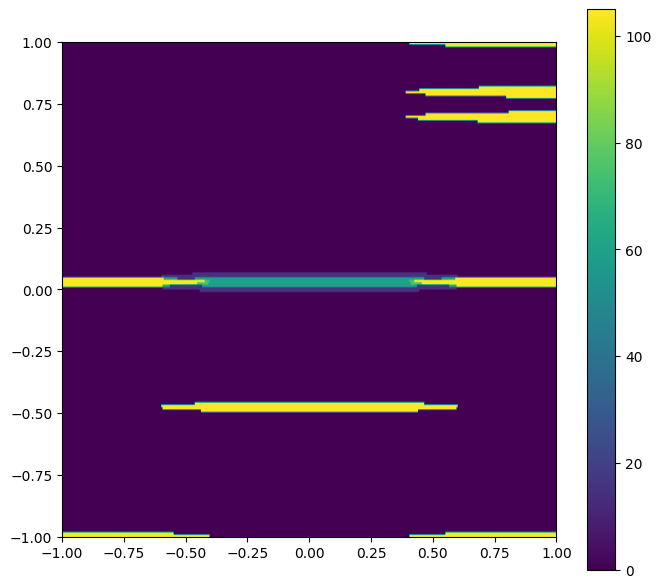

In [7]:
#gdal_print_metadata(tif_name=new_main_name_full)
plot_raster(tif_name=new_main_name_full, fig_size=(7,6))

In [62]:
run_polygonize(
    input_tif=new_main_name_full,
    mask='none',
    options=["-mask",new_main_name_full])

polygon_dict = shp_of_polygons_to_binned_dict(shp_file_name=new_main_name_full,bins=bm_dens_bins)

Opened shapefile from shapefiles/test_grid03_coor-bm_dens--nearest-0.0001-0.0001.shp.zip. Shape: (20, 2)
Converted shapefile to binned polygon dictionary


In [10]:
geo_df

,bm_dens,bm_dens_s,geometry
48,100,0,POINT (9.06584 56.83475)
99,100,0,POINT (9.06584 56.83429)
147,10,1,POINT (9.06748 56.83476)
148,100,0,POINT (9.06748 56.83475)
149,10,1,POINT (9.06748 56.83474)
173,100,0,POINT (9.06748 56.83452)
200,100,0,POINT (9.06912 56.83519)
210,100,0,POINT (9.06912 56.83510)
215,100,0,POINT (9.06912 56.83506)
248,100,0,POINT (9.06912 56.83475)


In [12]:
polygon_df = add_square_buffer_to_geo_df(geo_df=geo_df)

In [21]:
polygon_df

,bm_dens,bm_dens_s,geometry,buffer
48,100,0,POINT (9.06584 56.83475),"POLYGON ((9.06589 56.83480, 9.06589 56.83470, ..."
99,100,0,POINT (9.06584 56.83429),"POLYGON ((9.06589 56.83434, 9.06589 56.83424, ..."
147,10,1,POINT (9.06748 56.83476),"POLYGON ((9.06753 56.83481, 9.06753 56.83471, ..."
148,100,0,POINT (9.06748 56.83475),"POLYGON ((9.06753 56.83480, 9.06753 56.83470, ..."
149,10,1,POINT (9.06748 56.83474),"POLYGON ((9.06753 56.83479, 9.06753 56.83469, ..."
173,100,0,POINT (9.06748 56.83452),"POLYGON ((9.06753 56.83457, 9.06753 56.83447, ..."
200,100,0,POINT (9.06912 56.83519),"POLYGON ((9.06917 56.83524, 9.06917 56.83514, ..."
210,100,0,POINT (9.06912 56.83510),"POLYGON ((9.06917 56.83515, 9.06917 56.83505, ..."
215,100,0,POINT (9.06912 56.83506),"POLYGON ((9.06917 56.83511, 9.06917 56.83501, ..."
248,100,0,POINT (9.06912 56.83475),"POLYGON ((9.06917 56.83480, 9.06917 56.83470, ..."
